# Multivariate kernel density estimation

In [3]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import statsmodels.api as sm
import seaborn as sns
sns.set()
%matplotlib inline

In [4]:
# Read the DataKDE csv and display the 5 last rows
df = pd.read_csv('../../../Data/DataKDE.csv')
df.tail()

,Name,Realised 1yr Vol,CF2Debt Ratio,DefaultRisk
477,K+S AG,36.53,-0.40,High
478,Lundin Petroleum AB,29.05,-0.48,High
479,UnipolSai SpA,29.79,-0.49,Low
480,Capital & Counties Properties PLC,17.62,-0.55,Low
481,TNT Express NV,32.70,-0.77,High


Not overly happy with the column names in the csv file, so let's see if we can change them :
into ' Volatility ' and 'FCF2Debt '

In [5]:
df.columns = ['Name', 'Volatility', 'CF2Debt', 'DefaultRisk']
df.columns

Index(['Name', 'Volatility', 'CF2Debt', 'DefaultRisk'], dtype='object')

We use the groupby() function of Pandas to have some average position of the storm

In [8]:
# Group the rows with the same "DefaultRisk"
dfs = df.groupby('DefaultRisk')

In [10]:
# The grouped dataframe has the following properties 
AvgLevels = dfs[['Volatility','CF2Debt']].mean()
# display the mean of the columns "volatility" and "CF2Debt"
AvgLevels

,Volatility,CF2Debt
DefaultRisk,,
High,30.477500,0.075000
Low,23.226425,1.435894


<b>First Observation:</b><br>High Realized Equity Volatility and Low Free Cashflow is associated with High Default Risk

In [11]:
# Creating two dataFrames from the original dataframe df accroding to the Default Risk
df_HDefRisk = df[(df.DefaultRisk == 'High')]
df_LDefRisk = df[(df.DefaultRisk == 'Low')]
print(type(df_HDefRisk))
print(("The average realized equity volatility of Low Default is : {k: 0.02f}").format(k=df_LDefRisk['Volatility'].mean()))
print("(This result matches what we found when earlier grouping the dataframe)")

<class 'pandas.core.frame.DataFrame'>
The average realized equity volatility of Low Default is :  23.23
(This result matches what we found when earlier grouping the dataframe)


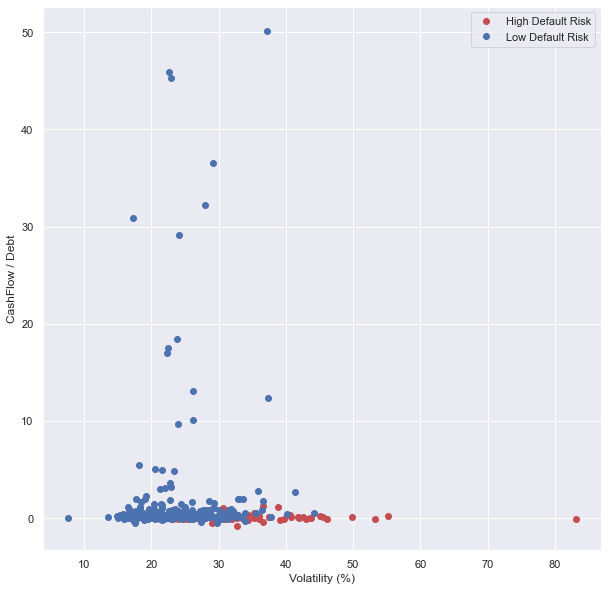

In [12]:
plt.figure(figsize=(10,10))
# Plot both high and low risk data's Volatility agains the "CF2Debt"
plt.plot(df_HDefRisk.Volatility,df_HDefRisk.CF2Debt,'or',label='High Default Risk')
plt.plot(df_LDefRisk.Volatility,df_LDefRisk.CF2Debt,'ob',label='Low Default Risk')
plt.legend()
plt.xlabel('Volatility (%)')
plt.ylabel('CashFlow / Debt');

The Multivariate kernel density estimator from the <b>statsmodels </b> package is going to be used. 
We can find more info on the model using the "?" in front of the function

In [13]:
# The function "KDEMultivariate" receives a list with the data, and a "var_time" for each element in data.
# the "c" stands for continuous data. see https://www.statsmodels.org/stable/generated/statsmodels.nonparametric.kernel_density.KDEMultivariate.html
KDE_HighDefaultRisk = sm.nonparametric.KDEMultivariate(data=[df_HDefRisk.Volatility, df_HDefRisk.CF2Debt], 
                                                       var_type='cc')
KDE_LowDefaultRisk = sm.nonparametric.KDEMultivariate(data=[df_LDefRisk.Volatility, df_LDefRisk.CF2Debt], 
                                                      var_type='cc')

In [10]:
# Low free cashflow is creating high default risk
print(KDE_LowDefaultRisk.pdf([20,1]))
print(KDE_HighDefaultRisk.pdf([20,1]))
print(KDE_HighDefaultRisk.bw)
print(KDE_LowDefaultRisk.bw)

0.013090641803160831
0.000107063991959003
[4.0105288  0.10812561]
[1.92194748 2.2855728 ]


<h3> Use the seaborn visualization package </h3> <br>
This comes with a 2D KDE calculation 

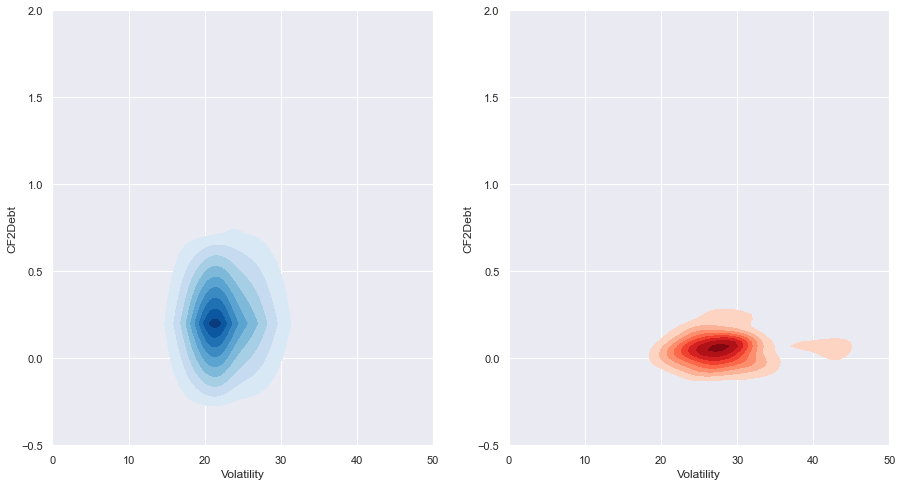

In [15]:
f, ax = plt.subplots(1,2,figsize=(15,8))
# We can do te KDE and plot it directly using the sns.kdeplot routine
sns.kdeplot(df_HDefRisk.Volatility,df_HDefRisk.CF2Debt,
                 cmap="Reds", shade=True, shade_lowest=False,ax=ax[1])

sns.kdeplot(df_LDefRisk.Volatility,df_LDefRisk.CF2Debt,
                 cmap="Blues", shade=True, shade_lowest=False,ax=ax[0])
# limit the axis of the plot
ax[0].set_ylim(-0.5,2)
ax[1].set_ylim(-0.5,2)
ax[0].set_xlim(0,50)
ax[1].set_xlim(0,50);